# Generación de observaciones aleatorias a partir de una distribución de probabilidad

La primera etapa de la simulación es la **generación de números aleatorios**. Los números aleatorios sirven como el bloque de construcción de la simulación. La segunda etapa de la simulación es la **generación de variables aleatorias basadas en números aleatorios**. Esto incluye generar variables aleatorias <font color ='red'> discretas y continuas de distribuciones conocidas </font>. En esta clase, estudiaremos técnicas para generar variables aleatorias.

Intentaremos dar respuesta a el siguiente interrogante:
>Dada una secuencia de números aleatorios, ¿cómo se puede generar una secuencia de observaciones aleatorias a partir de una distribución de probabilidad dada? Varios enfoques diferentes están disponibles, dependiendo de la naturaleza de la distribución

Considerando la generación de números alestorios estudiados previamente, asumiremos que tenemos disponble una secuencia $U_1,U_2,\cdots$ variables aleatorias independientes, para las cuales se satisface que:
$$
P(U_i\leq u) = \begin{cases}0,& u<0\\ u,&0\leq u \leq 1\\ 1,& u>1 \end{cases}
$$
es decir, cada variable se distribuye uniformemente entre 0 y 1.

**Recordar:** En clases pasadas, observamos como transformar un número p-seudoaletorio distribuido uniformemte entre 0 y 1, en una distribución normalmente distribuida con media $(\mu,\sigma^2)\longrightarrow$ <font color='red'> Médoto de Box Muller </font> como un caso particular.

En esta sesión, se presentarán dos de los técnicas más ampliamente utilizados para generar variables aletorias, a partir de una distribución de probabilidad.

## 1. Método de la transformada inversa

Este método puede ser usado en ocasiones para generar una observación aleatoria. Tomando $X$ como la variable aletoria involucrada, denotaremos la función de distribución de probabilidad acumulada por
$$F(x)=P(X\leq x),\quad \forall x$$
<font color ='blue'> Dibujar graficamente esta situación en el tablero</font>

El método de la transformada inversa establece
$$X = F^{-1}(U),\quad U \sim \text{Uniforme[0,1]}$$
donde $F^{-1}$ es la transformada inversa de $F$.

Recordar que $F^{-1}$ está bien definida si $F$ es estrictamente creciente, de otro modo necesitamos una regla para solucionar los casos donde esta situación no se satisface. Por ejemplo, podríamos tomar
$$F^{-1}(u)=\inf\{x:F(x)\geq u\}$$ 
Si hay muchos valores de $x$ para los cuales $F(x)=u$, esta regla escoje el valor mas pequeño. Observar esta situación en el siguiente ejemplo:

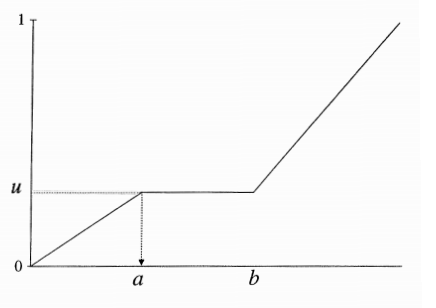
Observe que en el intervalo $(a,b]$ si $X$ tiene distribución $F$, entonces
$$P(a<X\leq b)=F(b)-F(a)=0\longrightarrow \text{secciones planas}$$

Por lo tanto si $F$ tienen una densidad continua, entonces $F$ es estrictamente creciente y su inversa está bien definida. 


Ahora observemos cuando se tienen las siguientes funciones:
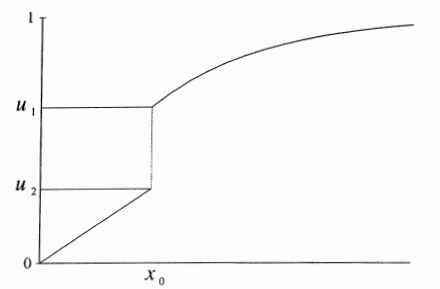
Observemos que sucede en $x_0$
$$\lim_{x \to x_0^-} F(x)\equiv F(x^-)<F(x^+)\equiv \lim_{x\to x_0^+}F(x)$$
Bajo esta distribución el resultado $x_0$ tiene probabilidad $F(x^+)-F(x^-)$. Por otro lado todos los valores de $u$ entre $[u_2,u_1]$ serán mapeados a $x_0$.

Los siguientes ejemplos mostrarán una implementación directa de este método.

### Ejemplo 1: Distribución exponencial
La distribución exponencial con media $\theta$ tiene distribución 
$$F(x)=1-e^{-x/\theta}, \quad x\geq 0$$
> Distrubución exponencial python: https://en.wikipedia.org/wiki/Exponential_distribution

>### <font color= blue> Mostrar en el tablero la demostración 

In [1]:
# Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creamos la función que crea muestras distribuidas exponencialmente
def D_exponential(theta,N):
    return -np.log(np.random.random(N))*theta

3.9921135695020338


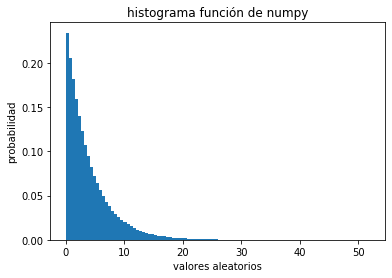

In [3]:
theta = 4 # Media
N = 10**6 # Número de muestras
# creamos muestras exponenciales con la función que esta en numpy
x = np.random.exponential(theta,N) 
# creamos muestras exponenciales con la función creada
x2 = D_exponential(theta,N)
# Graficamos el historial para x
plt.hist(x,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función de numpy')
print(np.mean(x))
plt.show()

4.001230638684006


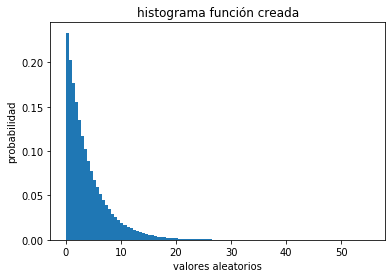

In [4]:
plt.hist(x2,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')
print(np.mean(x2))
plt.show()

### Ejemplo 2
Se sabe que la distribución Erlang resulta de la suma de $k$ variables distribuidas exponencialmente cada una con media $\theta$, y por lo tanto esta variable resultante tiene distribución Erlang de tamaño $k$ y media $theta$.

> Enlace distribución Erlang: https://en.wikipedia.org/wiki/Erlang_distribution

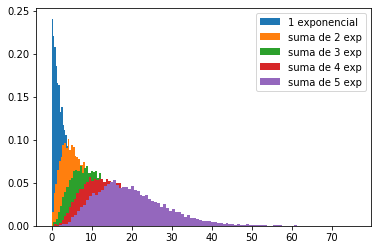

In [5]:
N = 10**4
# Variables exponenciales
x1 = np.random.exponential(4,N)
x2 = np.random.exponential(4,N)
x3 = np.random.exponential(4,N)
x4 = np.random.exponential(4,N)
x5 = np.random.exponential(4,N)

# Variables erlang
e0 = x1
e1 = (x1+x2)
e2 = (x3+x4+x5)
e3 = (x1+x2+x3+x4)
e4 = x1+x2+x3+x4+x5
plt.hist(e0,100,density=True,label='1 exponencial')
plt.hist(e1,100,density=True,label='suma de 2 exp')
plt.hist(e2,100,density=True,label='suma de 3 exp')
plt.hist(e3,100,density=True,label='suma de 4 exp')
plt.hist(e4,100,density=True,label='suma de 5 exp')
plt.legend()

plt.show()

In [6]:
# Función para crear variables aleatorias Erlang
def D_erlang(theta:'media distrubucion',k,N):
    f = np.random.rand(N,k)  # Matriz de variables aleatorias de dim N*k mejora la velocidad del algoritmo
    y =list(map(lambda i:-(theta)*np.log(np.prod(f[i,:])),range(N)))
    return y

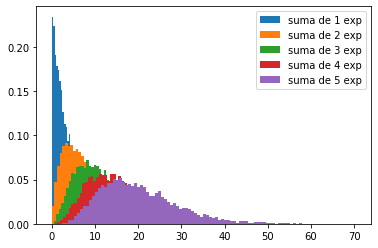

In [45]:
# Prueba de la función creada
N = 10**4
k = 3
theta = 4

# Resolver acá

plt.legend()
plt.show()

### Función de densidad variables Erlang

$$p(x)=x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}\equiv x^{k-1}\frac{e^{-x/\theta}}{\theta^k(k-1)!}$$

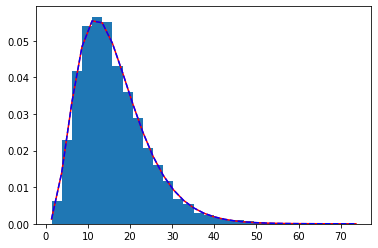

In [51]:
#Librería que tiene la función gamma y factorial 
# Para mostrar la equivalencia entre el factorial y la función gamma
import scipy.special as sps 
from math import factorial as fac
k = 4
theta = 4

x = np.arange(0,60,0.01)
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
y2 = x**(k-1)*(np.exp(-x/theta) /(fac(k-1)*theta**k))
plt.plot(x,y,'r')
plt.plot(x,y2,'b--')
plt.show()

# Creo variables aleatorias erlang y obtengo su histograma en la misma gráfica anterior


Para mejorar la eficiencia, creemos una función que grafique la misma gráfica anterior pero este caso que le podamos variar los parámetros `k` y $\theta$ de la distribución

In [57]:
# Función que grafica subplots para cada señal de distribución Erlang
def histograma_erlang(signal:'señal que desea graficar',
                      k:'Parámetro de la función Erlang'):

    plt.figure(figsize=(8,3))
    count, x, _ = plt.hist(signal,100,density=True,label='k=%d'%k)
    y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
    plt.plot(x, y, linewidth=2,color='k')
    plt.ylabel('Probabilidad')
    plt.xlabel('Muestras')
    plt.legend()
    plt.show()

Con la función anterior, graficar la función de distribución de una Erlang con parámetros $\theta = 4$ y `Ks = [1,8,3,6] `

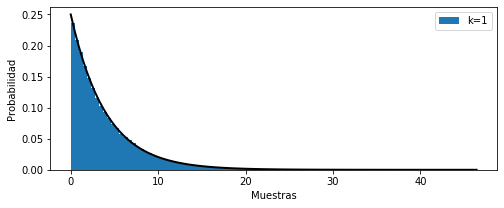

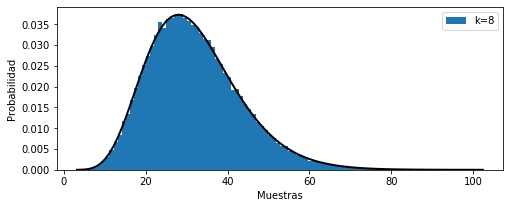

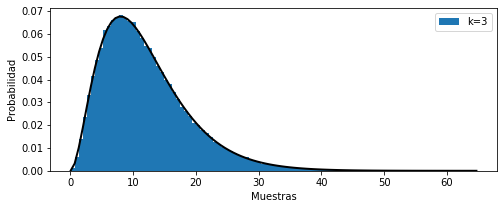

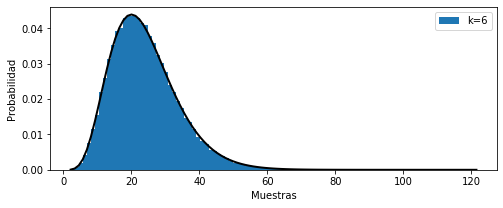

In [59]:
theta = 4    # media 
N = 10**5    # Número de muestras
Ks = [1,8,3,6] # Diferentes valores de k para la distribución Erlang
# Obtengo
Y = list(map(lambda k:D_erlang(theta,k,N),Ks))
list(map(histograma_erlang,Y,Ks));

>### <font color ='red'> Ejemplo 3  **Tarea** 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Ejemplo 4
Distribución de Rayleigh
$$F(x)=1-e^{-2x(x-b)},\quad x\geq b $$

> Fuente: https://en.wikipedia.org/wiki/Rayleigh_distribution

In [60]:
# Función del ejemplo 4
def D_rayleigh(b,N):
    return (b/2)+np.sqrt(b**2-2*np.log(np.random.rand(N)))/2

np.random.rayleigh?

# Función de Raylegh que contiene numpy
def D_rayleigh2(sigma,N):
    return np.sqrt(-2*sigma**2*np.log(np.random.rand(N)))

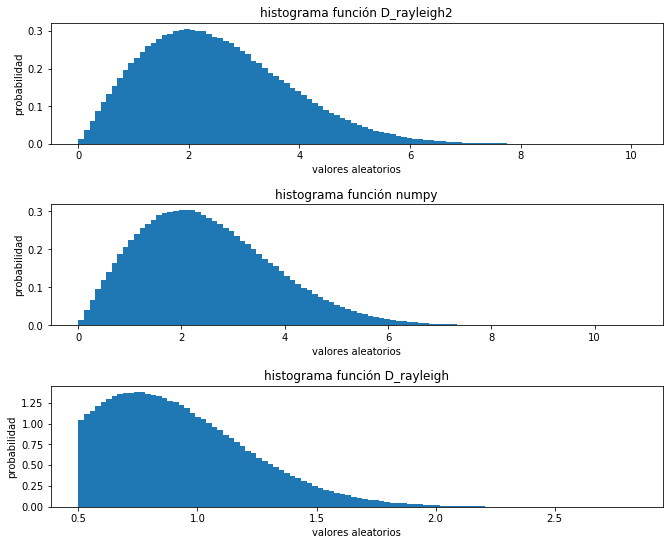

In [61]:
b = 0.5; N =10**6;sigma = 2
r = D_rayleigh(b,N)              # Función del ejemplo 
r2 = np.random.rayleigh(sigma,N) # Función que contiene python
r3 = D_rayleigh2(sigma,N)        # Función creada de acuerdo a la función de python

plt.figure(1,figsize=(10,8))
plt.subplot(311)
plt.hist(r3,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función D_rayleigh2')

plt.subplot(312)
plt.hist(r2,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función numpy')

plt.subplot(313)
plt.hist(r,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función D_rayleigh')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95,
                    hspace=.5,wspace=0)
plt.show()

## Distribuciones discretas

Para una variable dicreta, evaluar $F^{-1}$ se reduce a buscar en una tabla. Considere por ejemplo una variable aleatoria discreta, cuyos posibles valores son $c_1<c_2<\cdots<c_n$. Tome $p_i$ la probabilidad alcanzada por $c_i$, $i=1,\cdots,n$ y tome $q_0=0$, en donde $q_i$ representa las **probabilidades acumuladas asociadas con $c_i$** y está definido como:
$$q_i=\sum_{j=1}^{i}p_j,\quad i=1,\cdots,n \longrightarrow q_i=F(c_i)$$
Entonces, para tomar muestras de esta distribución se deben de realizar los siguientes pasos:
   1. Generar un número uniforme $U$ entre (0,1).
   2. Encontrar $k\in\{1,\cdots,n\}$ tal que $q_{k-1}<U\leq q_k$
   3. Tomar $X=c_k$.

### Ejemplo numérico

In [63]:
# Librería para crear tablas
import pandas as pd

In [126]:
val    = [1,2,3,4,5]
p_ocur = [.1,.2,.4,.2,.1]
p_acum = np.cumsum(p_ocur)

df = pd.DataFrame(index=val,columns=['Probabilidades','Probabilidad acumulada'], dtype='float')
df.index.name = "Valores (índices)"
df.loc[val,'Probabilidades'] = p_ocur
df.loc[val,'Probabilidad acumulada'] = p_acum
df

,Probabilidades,Probabilidad acumulada
Valores (índices),,
1,0.1,0.1
2,0.2,0.3
3,0.4,0.7
4,0.2,0.9
5,0.1,1.0


In [66]:
u = .92
print(sum(1 for i in p_acum if i<u)+1)

5


In [104]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

[1017 2014 3975 2045  949] [1.  1.8 2.6 3.4 4.2 5. ]


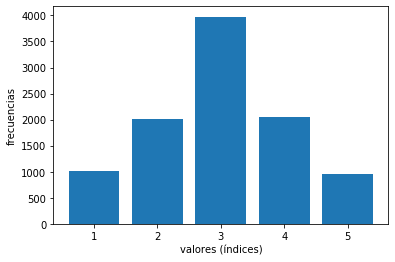

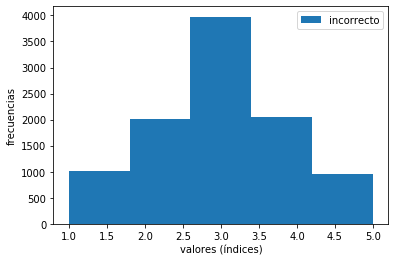

In [128]:
N = 10**4
u =np.random.rand(N)
v = Gen_distr_discreta(u,p_acum)+1 #+1 porque los índices comienzan en 1 
# print(u,v)

# Método 1 (Correcto)
hist,bins = np.histogram(v,bins=len(val))
print(hist,bins)
plt.bar(val,hist)
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.show()
 
# Método 2 (incorrecto)
y,x,_ = plt.hist(v,bins=len(val))
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.legend(['incorrecto'])
plt.show()


In [144]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

In [8]:
# Función que calcula la probabilidad acumulada
def P_acum_Binomial(n,p):
    c  = p/(1-p)
    pr = [(1-p)**n]
    add = pr.append
    for i in range(n+1):
        add((c*(n-i)/(i+1))*pr[-1])
    return np.cumsum(pr)

In [115]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

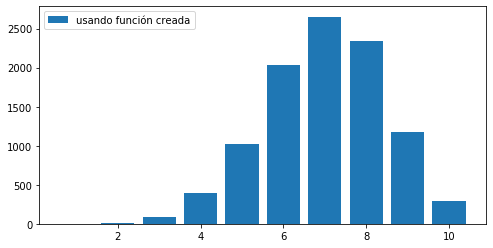

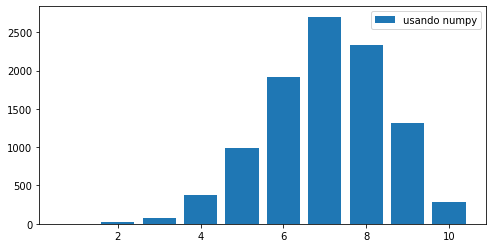

In [147]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

In [131]:
list(set(d_binomial))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

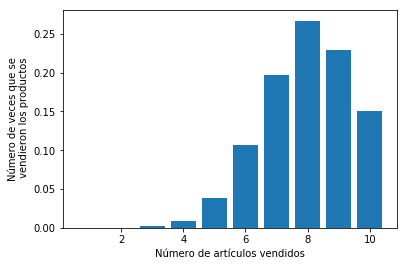

In [46]:
y,n = np.histogram(d_bino_numpy,range=(0,10),normed=True)
# y.size,n
plt.bar(n[1:],y, align='center')
plt.xlabel('Número de artículos vendidos')
plt.ylabel('Número de veces que se\n vendieron los productos')
plt.show()

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson